# Linear Regression:


---



---



## Introduction

In this exercise, you will implement Linear Regression algorithm to predict the value of houses using Dataset with Multiple features.

We strongly recommend Asking your colleagues and your Coach Using what's app group or classroom comments.

***kindly follow the instructions during the exercise and make sure that you tested your code well to successfully submit your assignment.***

**1. Run the next cell to import the needed libraries**

In [21]:
import math
import numpy as np                          # Dealing with Numpy Arrays
import pandas as pd                         # Dealing with Dataframes
import matplotlib.pyplot as plt             # matplotlib is used for ploting graphs
from IPython.display import HTML
from sklearn.preprocessing import MinMaxScaler

# Lets the plots appears in the notebook
%matplotlib inline

**2. After downloading the dataset files from kaggle, upload those files as follows, then run the next cell.**












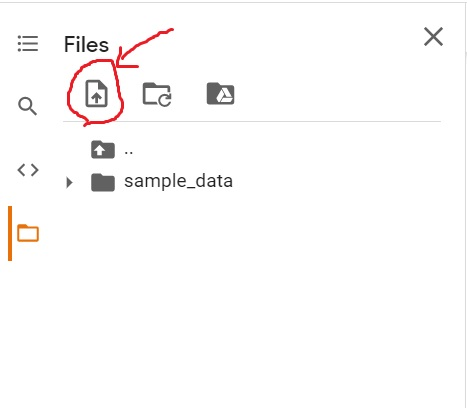

In [22]:
Training_Data = pd.read_csv('Training Data - Training Data.csv')
Testing_Data = pd.read_csv('Testing Data - Testing Data.csv')


# Training_Data.head(8) #quick look at first 8 records in my training data
print(Training_Data)
print(Testing_Data)

       HouseID  longitude  latitude  housing_median_age  total_rooms  \
0            0    -122.23     37.88                  41          880   
1            1    -122.22     37.86                  21         7099   
2            2    -122.24     37.85                  52         1467   
3            3    -122.25     37.85                  52         1274   
4            4    -122.25     37.85                  52         1627   
...        ...        ...       ...                 ...          ...   
16995    16995    -122.26     37.54                   5         3264   
16996    16996    -122.26     37.54                   5         1649   
16997    16997    -122.27     37.54                   5         2140   
16998    16998    -122.27     37.54                  16         3913   
16999    16999    -122.27     37.54                  15         2126   

       total_bedrooms  population  households  house_value  
0               129.0         322         126       452600  
1            

This notebook is prepared by ApplAi's Technical And Training Depratment, Please 
Don't use it outside the training without asking for permission as it's considered as Violation of Intellectual property rights

![ApplAi's Logo](https://media-exp1.licdn.com/dms/image/C4E0BAQHGLGltI2rzuQ/company-logo_200_200/0?e=2159024400&v=beta&t=adq8rNV09dPC6egdJMnfARt6Aq0TC9bSomFvFtm50WM)










**Here we notice that the data is having some null values, so we are going to replace them with the mean of the other values in the same column**

Don't worry this will be explained in details in the next session.

In [23]:
Training_Data.isnull().sum()
Testing_Data.isnull().sum()

HouseID                0
longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        44
population             0
households             0
dtype: int64

In [24]:
Training_Data_mean=int(Training_Data["total_bedrooms"].mean())

                        # first way for repalceing null values 
    
# replacing all null values with the mean 
Training_Data["total_bedrooms"]=Training_Data["total_bedrooms"].fillna(Training_Data_mean)


                        # second way for repalceing null values 
    

# Training_Data.dropna(subset=['total_bedrooms'],axis =0,inplace=True) #removing all rows with value null 


In [25]:
Training_Data.isnull().sum()

HouseID               0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
house_value           0
dtype: int64

**3. Run the next cell to know the correlation between our features and the predictive column.**

To more information about correlation ==> [view link](https://www.mathsisfun.com/data/correlation.html)

In [26]:
Training_Data.corr()

,HouseID,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,house_value
HouseID,1.000000,0.209288,-0.208192,-0.155926,0.093283,0.077943,0.057965,0.068774,0.076515
longitude,0.209288,1.000000,-0.932110,-0.172661,0.053061,0.070372,0.106701,0.058390,-0.013033
latitude,-0.208192,-0.932110,1.000000,0.056408,-0.036016,-0.064147,-0.111253,-0.070959,-0.152201
housing_median_age,-0.155926,-0.172661,0.056408,1.000000,-0.369707,-0.329343,-0.302850,-0.310660,0.121071
total_rooms,0.093283,0.053061,-0.036016,-0.369707,1.000000,0.927201,0.854456,0.916766,0.134150
total_bedrooms,0.077943,0.070372,-0.064147,-0.329343,0.927201,1.000000,0.873023,0.975850,0.056177
population,0.057965,0.106701,-0.111253,-0.302850,0.854456,0.873023,1.000000,0.906499,-0.026999
households,0.068774,0.058390,-0.070959,-0.310660,0.916766,0.975850,0.906499,1.000000,0.071396
house_value,0.076515,-0.013033,-0.152201,0.121071,0.134150,0.056177,-0.026999,0.071396,1.000000


**4. After studying the correlation and visualizing data using Microsoft Power BI, if you want to drop any extra column from data run the following cell with adding the column name to the list of columns you want to drop.** 

example: if I want to drop HouseID and population columns 

```
Training_Data.drop(['HouseID', 'population'], axis = 1, inplace = True)
Testing_Data.drop(['HouseID', 'population'], axis = 1, inplace = True)
```



**Please Note if you want to drop any column from training data, you should also drop it from testing data.**

In [27]:
Training_Data.drop(['HouseID'], axis = 1, inplace = True) #dropping the id column
Testing_Data_mean=int(Testing_Data["total_bedrooms"].mean())
Testing_Data["total_bedrooms"]=Testing_Data["total_bedrooms"].fillna(Testing_Data_mean)
Testing_Data.drop(['HouseID'], axis = 1, inplace = True)

## Kindly Don't change the following lines of code
## here we make the range of all numbers between -1 to 1 to avoid overflow and go faster to the global minimum 
## we will discuss it next session 

scaler = MinMaxScaler()
Training_Data.iloc[:,0:-1] = pd.DataFrame(scaler.fit_transform(Training_Data.iloc[:,0:-1]), columns=Training_Data.columns[0:-1])
Testing_Data = pd.DataFrame(scaler.fit_transform(Testing_Data), columns=Testing_Data.columns)

**5. Run the next cell to separate the Training_Data to x_train and y_train, the Testing_Data as x_test nad converting them to numpy arrays.**

**Remember that our goal to predict *y_test*.** 

In [28]:
print(len(Training_Data.iloc[0,:]))
print(Training_Data.head(5))

8
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.211155  0.567481            0.784314     0.022331        0.019863   
1   0.212151  0.565356            0.392157     0.180503        0.171477   
2   0.210159  0.564293            1.000000     0.037260        0.029330   
3   0.209163  0.564293            1.000000     0.032352        0.036313   
4   0.209163  0.564293            1.000000     0.041330        0.043296   

   population  households  house_value  
0    0.008941    0.020556       452600  
1    0.067210    0.186976       358500  
2    0.013818    0.028943       352100  
3    0.015555    0.035849       341300  
4    0.015752    0.042427       342200  


In [29]:
print(Training_Data.iloc[:,-1])

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
16995    500001
16996    417300
16997    438800
16998    419700
16999    500001
Name: house_value, Length: 17000, dtype: int64


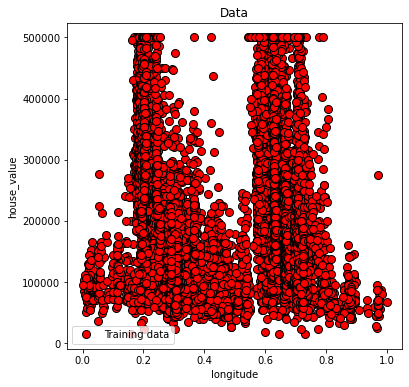

In [30]:
plt.figure(figsize=(6, 6))
plt.plot(Training_Data.iloc[:,0:1], Training_Data.iloc[:,-1], 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('longitude')
plt.ylabel('house_value')
plt.grid(False)
plt.legend(['Training data']);

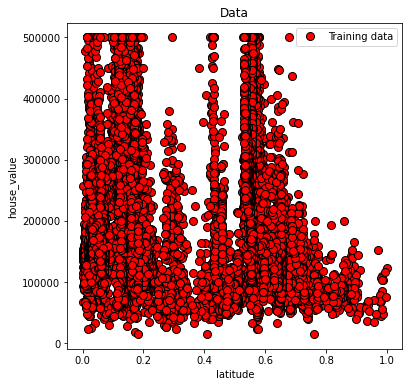

In [31]:
plt.figure(figsize=(6, 6))
plt.plot(Training_Data.iloc[:,1:2], Training_Data.iloc[:,-1], 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('latitude')
plt.ylabel('house_value')
plt.grid(False)
plt.legend(['Training data']);

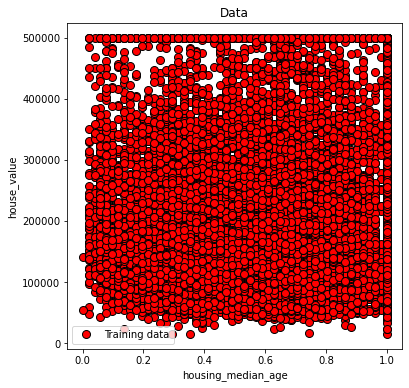

In [32]:
plt.figure(figsize=(6, 6))
plt.plot(Training_Data.iloc[:,2:3], Training_Data.iloc[:,-1], 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('housing_median_age')
plt.ylabel('house_value')
plt.grid(False)
plt.legend(['Training data']);

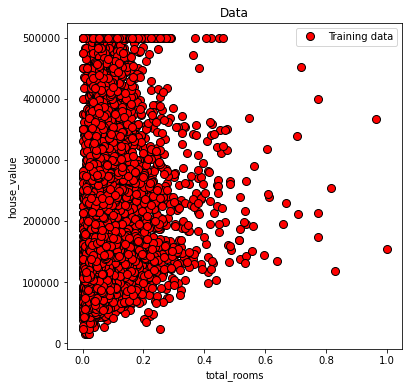

In [33]:

plt.figure(figsize=(6, 6))
plt.plot(Training_Data.iloc[:,3:4], Training_Data.iloc[:,-1], 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('total_rooms')
plt.ylabel('house_value')
plt.grid(False)
plt.legend(['Training data']);

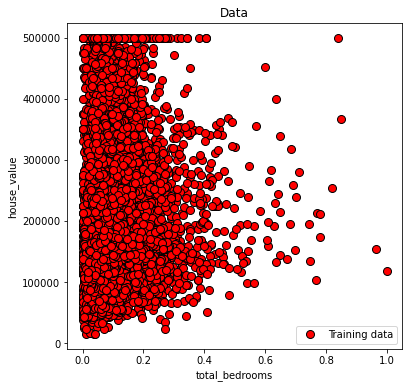

In [34]:
plt.figure(figsize=(6, 6))
plt.plot(Training_Data.iloc[:,4:5], Training_Data.iloc[:,-1], 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('total_bedrooms')
plt.ylabel('house_value')
plt.grid(False)
plt.legend(['Training data']);

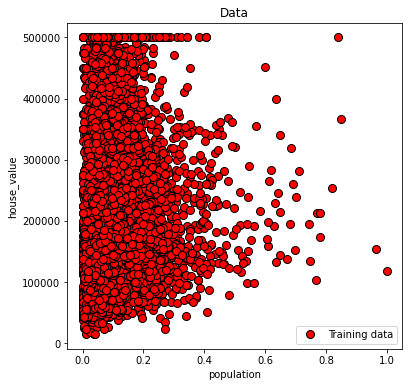

In [35]:
plt.figure(figsize=(6, 6))
plt.plot(Training_Data.iloc[:,4:5], Training_Data.iloc[:,-1], 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('population')
plt.ylabel('house_value')
plt.grid(False)
plt.legend(['Training data']);

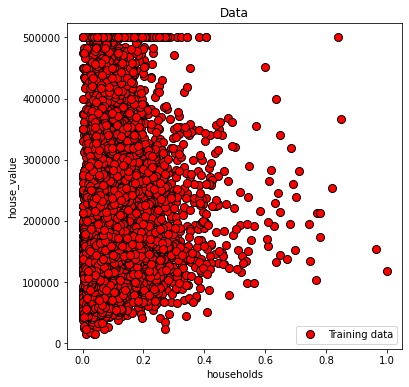

In [36]:
plt.figure(figsize=(6, 6))
plt.plot(Training_Data.iloc[:,4:5], Training_Data.iloc[:,-1], 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('households')
plt.ylabel('house_value')
plt.grid(False)
plt.legend(['Training data']);

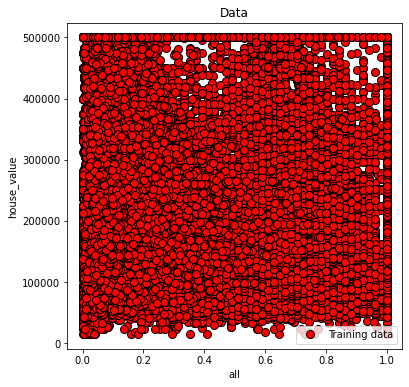

In [37]:
plt.figure(figsize=(6, 6))
plt.plot(Training_Data.iloc[:,0:7], Training_Data.iloc[:,-1], 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('all')
plt.ylabel('house_value')
plt.grid(False)
plt.legend(['Training data']);

In [38]:
# seprate date in arras 

x_train = np.array(Training_Data.iloc[:,0:len(Training_Data.iloc[0,:]) - 1])
# print(x_train.shape)  ==>(17000,7)  all columns exept house value 
# print(x_train)

y_train = np.array(Training_Data.iloc[:,-1])
# print(y_train.shape)  ==>(17000,1)  house value
# print(y_train)

y_train = y_train.reshape(y_train.shape[0], 1)


x_test = np.array(Testing_Data)

x_train = np.append(np.ones((x_train.shape[0], 1)), x_train, axis = 1) #adding one because of multiplication 
x_test = np.append(np.ones((x_test.shape[0], 1)), x_test, axis = 1)


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)


if (x_train.shape[0] != y_train.shape[0]) or (x_train.shape[1] != x_test.shape[1]):
  print("Unfortunately! you have a problem in shapes, kindly fix it then complete the exercise.")
else:
  print("You can complete your exercise!")

(17000, 8)
(17000, 1)
(3640, 8)
You can complete your exercise!


**6. Run the next cell to define alpha, number of iterations using in gradient descent and m (number of training examples).**

In [39]:
alpha = 0.001
num_of_iterations = 10000000  #number of iterations  
m = int(x_train.shape[0])
# print(m) the number of rows 

**7. Predictive Line Implementation**

Let's try to implement a hypothesis function which creates a line that we will use to predict any house price using it's size an input.
We can calculate the Predictions using the follwing formula by iterating over the training examples 

$$Prediction = \theta_0 + \theta_1 x$$

Which is equivalent to the Vectorized implementation 

$$Prediction = X. \theta \qquad \text{or}\qquad Prediction = \theta^T.X \qquad \text{According to Shapes of Matrices}$$ 




**Note that the current shape of X is (m,n) and Theta is (n,1)**

In [40]:
def Predictive_Line(X, Theta):

    Predictions = None
    
    #theta.shape(8,1)

  ## you don't need to append column of 1's as we appended above
  
  # ==================== YOUR CODE HERE =================================
    
    Predictions=np.dot(Theta.T,X)  # ===> (1,8)*(8,1700) == (1,17000)
    
    Predictions=Predictions.T    #prediction.shape  ==> (17000,1)
  # =====================================================================
  

    return Predictions

**8. Cost Function Implementation**

We Can Use any of the Above Lines to Predict any house price by using it's size as an input but as you see the lines doesn't fit the data correctly so first we need to calculate the Total Error to know the value of the total error we have to try to decrease that error value.
We are going to use Mean Square Error Method to calculate how good is our Linear Regression Model (Predictive Line)

$$ J = \frac{1}{2m} \sum_{i=1}^m \left( P(x^{(i)}) - y^{(i)}\right)^2$$
Where <br>
$J \:$ is the Cost Value <br>
$m \:$ is the number of training examples <br>
$i \:$ is the iterative variable which iterate over the training example <br>
$P \:$ is the predicted values of the points <br>
$y \:$ is the Real values of the points <br>

In [41]:
def Calculate_Cost(X, Theta, Y, m):
    J = 0
  # ==================== YOUR CODE HERE =================================
    P=Predictive_Line(X.T, Theta.reshape((8,1)))
    
    J=(1/2*m)*np.sum(np.square(P-y_train),axis=0)
  # ===================================================================== 
    return J

**9. Gradient Descent Implementation**

As we can observe from the graph and from the Cost Value, The Second Line Performs better than the first line, and the diffrence between them is the values of theta, so Let's try to get a better Line in a systematic way using gradient descent algorithm instead of just trying diffrent values of Thetas.

As we have seen the latest Concave shaped graph represents the Cost Function values while changing Theta0 but making Theta1 Constant to make it easier to understand.
Let's observe the point **R** in the following gif

In [42]:
HTML('<img src=https://media.giphy.com/media/f3vn9xqwDjGwqcW0YJ/giphy.gif width="400" height="300">')

let's say that we have initialized Theta0 randomly at the first value of Theta that point R started with, it had a very high cost function which means when we use this value of theta to generate Predictive line it won't be good enough and will do un-accurate predictions. As we noticed when the value of Theta0 increases the Cost Function or the Error Decreases till we reach the minimum Point

But what if the randomly initialized variable was at the right side of the minimum Point ?

In [43]:
HTML('<img src=https://media.giphy.com/media/L0f2cnZwRICHUuexD7/giphy.gif width="400" height="300">')

Just Unlike **R** when the value of Theta0 of point **S** Decreases the Cost Function or the Error **Decreases** till we reach the minimum Point.

So in order to know if we should **increase** or **decrease** Theta in order to **Decrease** the cost value we will use the Derivative in which if the value of the derivative of the cost function in a certain point is 
- **Negative (-ve)** that means we have to **increase** the Theta in order to **Decrease** the Cost Value.
- **Positive (-ve)** that means we have to **Decrease** the Theta in order to **Decrease** the Cost Value.

Take a look at the following equation you may think that $\alpha$ Variable is a variable that controls the step amount that means how much we will increase/decrease Theta
 
$$θ_j := θ_j − α\frac{∂}{∂θ_j}J(θ)$$

Note : This part of the Equation ($\frac{∂}{∂θ_j}J(θ)$) means the Partial derivative of the Cost function, it's given to you without having to do mathematical proof, but if you already know partial derivative rules you may give it a try 

After Calculating the Derivative of the Cost Function we will have our Update rule of Gradient Descent is 
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left(P(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$
Let's Try to implement the Gradient Descent to get the best Thetas values that fits the Best Line

In [44]:
def Gradient_Descent(X, Y, Theta, alpha, num_iters, m):

        # you don't need to append column of 1's as we appended above
#     Theta=Theta.reshape((1,x_train.shape[2]))
    # ==================== YOUR CODE HERE =================================
                  
    for i in range(num_of_iterations):
        P=Predictive_Line(X.T,Theta.reshape((8,1)))       
        Theta=Theta-(alpha/m)*np.sum(((P-Y).T).dot(X))

        #  Theta.shape  ==>(1,8)         

        # =====================================================================
    return Theta

**10. Generating a column of predictions for x_test and calculation the cost.**

In [45]:
thet=np.random.rand(1)
Theta = []
for i in range(0, x_train.shape[1]):
  Theta.append(0)

Theta = np.array(Theta).reshape((x_train.shape[1], 1)) # shape of theta is (n,1)

Theta = Gradient_Descent(x_train, y_train, Theta, alpha, num_of_iterations, m)

Cost = Calculate_Cost(x_train, Theta, y_train, m)

y_test = Predictive_Line(x_test.T, Theta)



print('Theta = ')
print(str(Theta))
print()
print('Cost = '+str(Cost))



Theta = 
[[76814.89327649]
 [76814.89327649]
 [76814.89327649]
 [76814.89327649]
 [76814.89327649]
 [76814.89327649]
 [76814.89327649]
 [76814.89327649]]

Cost = [1.9084368e+18]


(17000, 8)
(17000, 1)


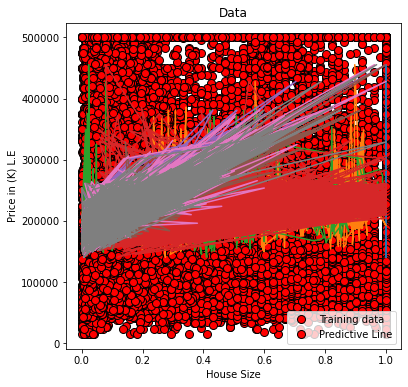

In [46]:
print(x_train.shape)
print(y_train.shape)
plt.figure(figsize=(6, 6))
plt.plot(x_train, y_train, 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('House Size')
plt.ylabel('Price in (K) L.E')
plt.grid(False)
plt.plot(x_test,y_test, '-')
plt.legend(['Training data', 'Predictive Line']);

**11. Replacing house_value values in sample submission file with y_test values and making a new submission file.**

In [47]:
Submission = pd.read_csv('sampleSubmission - sampleSubmission.csv')

Submission.iloc[:,1] = y_test
Submission.to_csv('Submission File.csv', index = False)

**12. A file with the name "Submission File.csv" will be created in the menu of files on the left of colab sheet, download it as follows then submit the file in kaggle.**

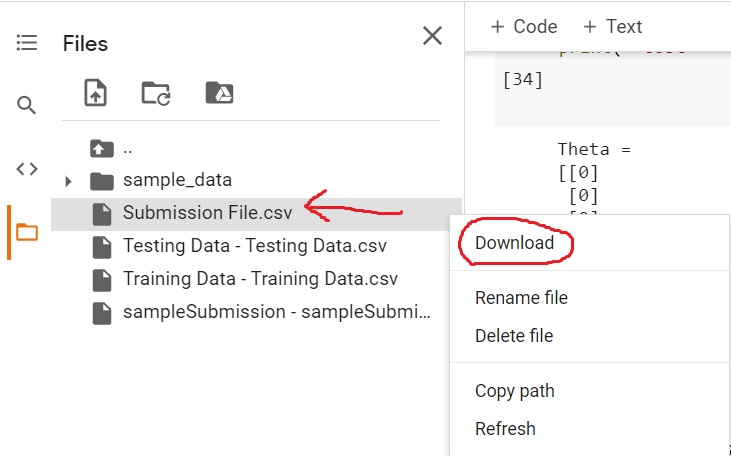

**if you want to make a new submission, repeat the steps above again with your modifications.** 

**13. Formatting error in kaggle**

if you have a file formatting error when you submit your file, check that the House_ID column format and the house_value column format in the Submission File is as wanted.

if you still have any problem kindly message your coach.


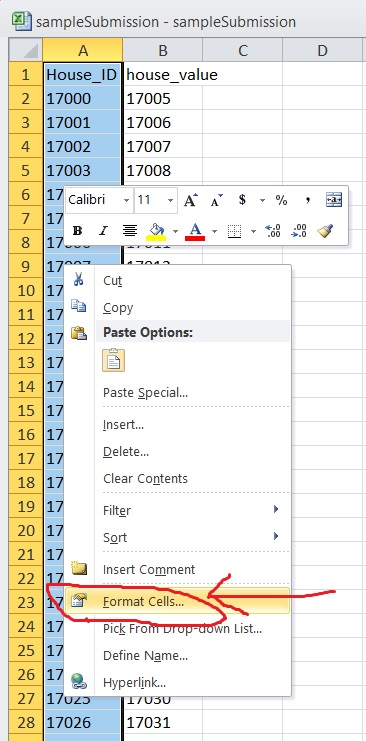